# Churn Prediction

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score
from sklearn import metrics
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import AdaBoostClassifier
from tqdm.auto import tqdm
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd
from sklearn import metrics


In [2]:
# read the data
Data= pd.read_csv('train.csv')

In [3]:
df = Data.copy()

## Data Pre-processing

### intial EDA

In [4]:
df.shape

(36992, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
# Specify the column names for which you want to find the available values, their counts, and null values
column_names = ["age", "gender",'region_category','membership_category','joining_date','joined_through_referral','referral_id','preferred_offer_types','medium_of_operation','internet_option','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback','churn_risk_score']

# Iterate over the specified columns
for column_name in column_names:
    # Get the value counts in the current column
    value_counts = df[column_name].value_counts()

    # Print the available values, their counts, and the presence of null values for the current column
    print("Available values and their counts in column", column_name)
    print(value_counts)

    print()

Available values and their counts in column age
33    720
42    716
16    716
38    714
30    711
61    709
60    704
57    704
41    699
59    696
55    695
28    694
34    692
47    691
21    689
32    685
17    683
56    682
29    681
48    680
45    680
46    679
58    678
62    677
22    677
26    675
53    675
52    672
64    672
10    670
14    670
49    669
23    669
36    668
44    661
12    661
19    660
51    660
27    659
43    657
63    656
35    656
50    656
11    654
13    654
37    653
15    649
24    645
39    642
20    641
31    636
25    635
18    629
40    628
54    608
Name: age, dtype: int64

Available values and their counts in column gender
F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

Available values and their counts in column region_category
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

Available values and their counts in column membership_category
Basic Membership       7724
No Memb

In [7]:
df.duplicated().sum()

0

In [8]:
# Assuming df is your DataFrame
df['joining_date'] = pd.to_datetime(df['joining_date'])
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

In [9]:
# Convert the 'avg_frequency_login_days' column to a float column type
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)

In [10]:
# Get the data types of each column in the DataFrame
data_types = df.dtypes

# Create empty lists to store the feature names based on their data types
numeric_features = []
categorical_features = []
datetime_features = []

# Iterate over each column and classify the features based on their data types
for column, data_type in data_types.items():
    if data_type == 'datetime64[ns]':
        datetime_features.append(column)
    elif data_type == 'object':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

# Print the classified features
print("Numeric Features:")
print(numeric_features)
print()
print("Categorical Features:")
print(categorical_features)
print()
print("Datetime Features:")
print(datetime_features)

Numeric Features:
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']

Categorical Features:
['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

Datetime Features:
['joining_date']


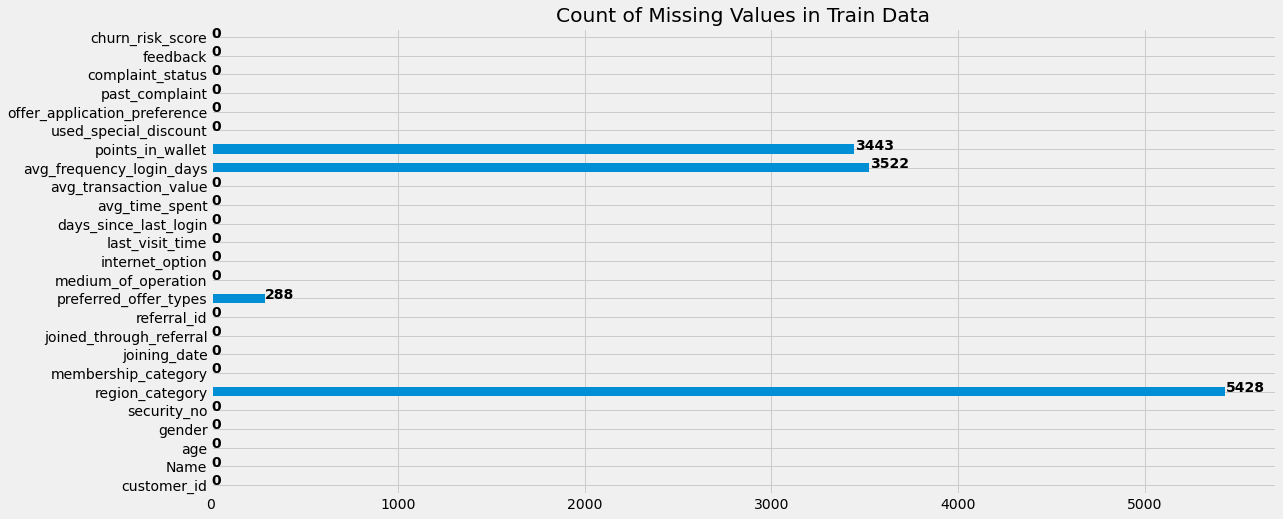

In [11]:
# Set the style for the plot
plt.style.use('fivethirtyeight')

# Calculate the count of missing values in each column
missing_values_count = df.isna().sum()

# Create the plot
ax = missing_values_count.plot(kind='barh', figsize=(17,8))

# Add the count of missing values on the plot
for i, v in enumerate(missing_values_count):
    ax.text(v + 3, i, int(v), color='black', fontweight='bold')

# Set the title for the plot
plt.title('Count of Missing Values in Train Data')

# Display the plot
plt.show()

### Dealing with garbage values

In [12]:
# Filter out rows with 'churn_risk_score' equal to -1 in the copy
df = df[df['churn_risk_score'] != -1]

# Convert the target column values from 1-5 to 0-4
df['churn_risk_score'] = df['churn_risk_score'] - 1

# Display the updated DataFrame
print(df)


                                customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category joining_date  \
0   

In [13]:
column_names= ['gender','medium_of_operation','days_since_last_login','avg_frequency_login_days']

# Specify the specific values you want to convert to nulls
values_to_replace = ['Unknown','?',-999,'Error']

# Convert the specific values in the specified columns to nulls for Train data
df[column_names] = df[column_names].replace(values_to_replace, np.nan)

In [14]:
# Modify 'joined_through_referral' column in the copy
df['joined_through_referral'] = ['No' if x == 'xxxxxxxx' else 'Yes' for x in df['referral_id']]

# Display the first 5 rows of the modified copy
df.head(5).T


,0,1,2,3,4
customer_id,fffe4300490044003600300030003800,fffe43004900440032003100300035003700,fffe4300490044003100390032003600,fffe43004900440036003000330031003600,fffe43004900440031003900350030003600
Name,Pattie Morrisey,Traci Peery,Merideth Mcmeen,Eufemia Cardwell,Meghan Kosak
age,18,32,44,37,31
gender,F,F,F,M,F
security_no,XW0DQ7H,5K0N3X1,1F2TCL3,VJGJ33N,SVZXCWB
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17 00:00:00,2017-08-28 00:00:00,2016-11-11 00:00:00,2016-10-29 00:00:00,2017-09-12 00:00:00
joined_through_referral,No,Yes,Yes,Yes,No
referral_id,xxxxxxxx,CID21329,CID12313,CID3793,xxxxxxxx


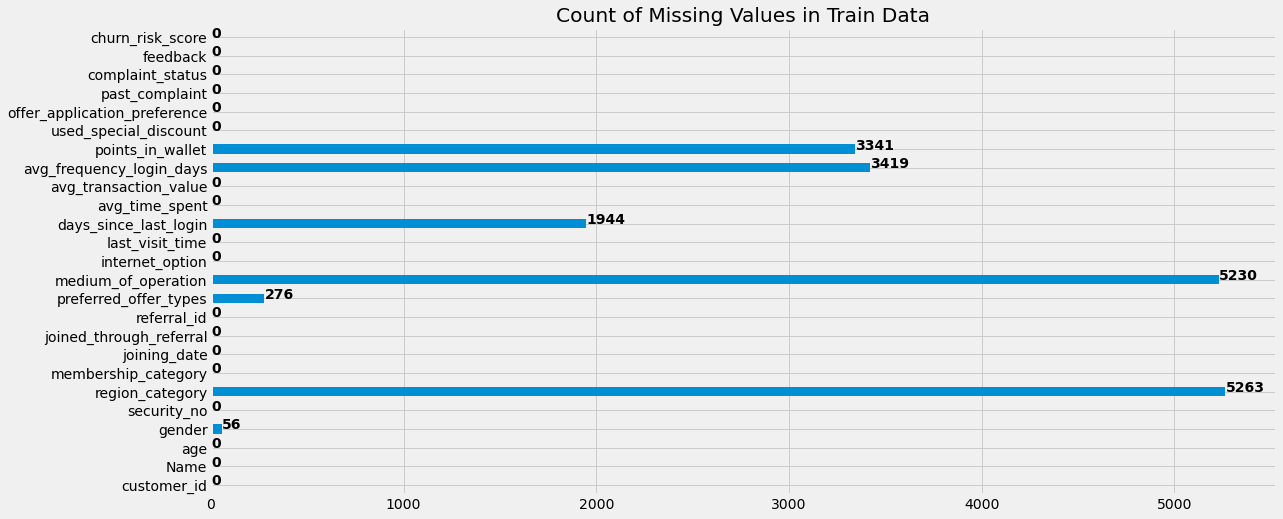

In [15]:
# Set the style for the plot
plt.style.use('fivethirtyeight')

# Calculate the count of missing values in each column
missing_values_count = df.isna().sum()

# Create the plot
ax = missing_values_count.plot(kind='barh', figsize=(17,8))
 
# Add the count of missing values on the plot
for i, v in enumerate(missing_values_count):
    ax.text(v + 3, i, int(v), color='black', fontweight='bold')

# Set the title for the plot
plt.title('Count of Missing Values in Train Data')

# Display the plot
plt.show()

In [16]:
print('Shape of train befor remove the identfier : ', df.shape)
# Save identifiers in a new DataFrame
identifiers = df[['customer_id','Name','security_no','referral_id']]

df.drop(labels=['customer_id','Name','security_no','referral_id'],axis=1,inplace=True)
df.drop(labels=['last_visit_time'],axis=1,inplace=True) # we don't need this column

# Print the shape of data
print('Shape of train after remove the identfier : ', df.shape)

Shape of train befor remove the identfier :  (35829, 25)
Shape of train after remove the identfier :  (35829, 20)


### Handling Missing Values

#### label Encoder for the nulls in Categorical Variables

In [17]:
# Calculate the number of days from today
df['days_since_joining'] = (datetime.now() - df['joining_date']).dt.days

# Drop the original 'joining_date' column
df.drop('joining_date', axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df.head(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joining
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,NaN,Wi-Fi,17.00,300.63,53005.25,17.00,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,1,2337
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.00,306.34,12838.38,10.00,NaN,Yes,No,Yes,Solved,Quality Customer Care,0,2326
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.00,516.16,21027.00,22.00,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,4,2616
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.00,53.27,25239.56,6.00,567.66,No,Yes,Yes,Unsolved,Poor Website,4,2629
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.00,113.13,24483.66,16.00,663.06,No,Yes,Yes,Solved,Poor Website,4,2311


In [18]:
# enccode the categorical columns with laabel encoder to handel the null values
columns_to_encode = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

def encode_categorical_with_nulls(dataset, categorical_columns):
    encoded_dataset = dataset.copy()
    label_encoders = {}

    for column in categorical_columns:
        # Encode non-null values
        non_null_mask = encoded_dataset[column].notnull()
        non_null_values = encoded_dataset.loc[non_null_mask, column]
        label_encoder = LabelEncoder()
        encoded_values = label_encoder.fit_transform(non_null_values)

        # Save the label encoder for later use
        label_encoders[column] = label_encoder

        # Replace non-null values with encoded values
        encoded_dataset.loc[non_null_mask, column] = encoded_values

    return encoded_dataset,label_encoders

Lencoded_df , label_encoders= encode_categorical_with_nulls(df, columns_to_encode)   

#### Imputing the nulls 

In [19]:
# Separate the DataFrame into features and target variable
imputed_df = Lencoded_df.copy()
X = imputed_df.drop(['churn_risk_score'], axis=1)
y = imputed_df['churn_risk_score']

# Use IterativeImputer to handle missing values
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1), random_state=42)
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to DataFrame
imputed_df = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Set the index of imputed_df to be the same as X's index
imputed_df.index = X.index

# Restore the 'churn risk score' column to the imputed DataFrame
imputed_df = pd.concat([imputed_df, Lencoded_df[['churn_risk_score']]], axis=1)


In [20]:
imputed_df['churn_risk_score'].unique()

array([1, 0, 4, 2, 3], dtype=int64)

In [21]:
imp_df=imputed_df.copy() # data frame after imputation
imp_df.head(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joining,churn_risk_score
0,18.00,0.00,2.00,3.00,0.00,1.00,0.98,2.00,17.00,300.63,53005.25,17.00,781.75,1.00,1.00,0.00,1.00,4.00,2337.00,1
1,32.00,0.00,0.00,4.00,1.00,1.00,1.00,1.00,16.00,306.34,12838.38,10.00,799.05,1.00,0.00,1.00,2.00,5.00,2326.00,0
2,44.00,0.00,1.00,2.00,1.00,1.00,1.00,2.00,14.00,516.16,21027.00,22.00,500.69,0.00,1.00,1.00,3.00,3.00,2616.00,4
3,37.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,11.00,53.27,25239.56,6.00,567.66,0.00,1.00,1.00,4.00,3.00,2629.00,4
4,31.00,0.00,0.00,2.00,0.00,0.00,2.00,1.00,20.00,113.13,24483.66,16.00,663.06,0.00,1.00,1.00,2.00,3.00,2311.00,4


#### Decoding the categorical variables with nulls

In [22]:
def decode_categorical_with_nulls(encoded_dataset, label_encoders, categorical_columns):
    decoded_dataset = encoded_dataset.copy()

    for column in categorical_columns:
        # Decode non-null values
        non_null_mask = decoded_dataset[column].notnull()
        encoded_values = decoded_dataset.loc[non_null_mask, column].astype(int)

        # Use the corresponding label encoder to inverse transform
        label_encoder = label_encoders.get(column)
        if label_encoder is not None:
            decoded_values = label_encoder.inverse_transform(encoded_values)

            # Replace encoded values with decoded values
            decoded_dataset.loc[non_null_mask, column] = decoded_values

    return decoded_dataset
decodedli_df = decode_categorical_with_nulls(imp_df, label_encoders, columns_to_encode)


### explonatory data analysis EDA

In [23]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df
categoricals = find_categorical(decodedli_df, cutoff=12)
summarize_categoricals(decodedli_df[categoricals], show_levels=True)

,Levels,No. of Levels,No. of Missing Values
gender,"[F, M]",2,0
region_category,"[Village, City, Town]",3,0
membership_category,"[Platinum Membership, Premium Membership, No M...",6,0
joined_through_referral,"[No, Yes]",2,0
preferred_offer_types,"[Gift Vouchers/Coupons, Credit/Debit Card Offe...",3,0
medium_of_operation,"[Both, Desktop, Smartphone]",3,0
internet_option,"[Wi-Fi, Mobile_Data, Fiber_Optic]",3,0
used_special_discount,"[Yes, No]",2,0
offer_application_preference,"[Yes, No]",2,0
past_complaint,"[No, Yes]",2,0


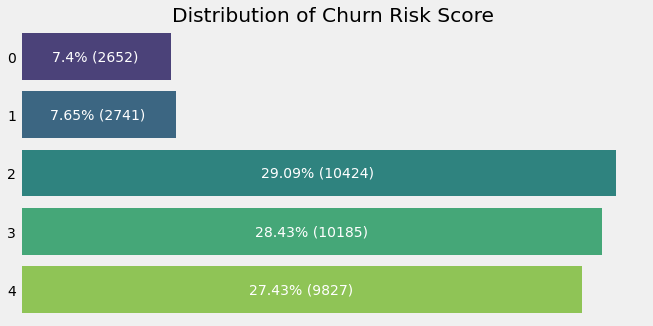

In [24]:
#cheak the balance of data
value_counts = decodedli_df['churn_risk_score'].value_counts().sort_index()
percentages = (value_counts / len(decodedli_df) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis', orient='h')

# Remove x-axis
ax.xaxis.set_visible(False)

# Add labels to each bar
for i, (count, percent) in enumerate(zip(value_counts.values, percentages.values)):
    ax.text(count/2, i, f"{percent}% ({count})", va='center', ha='center', color='white')

plt.title('Distribution of Churn Risk Score')
plt.show()

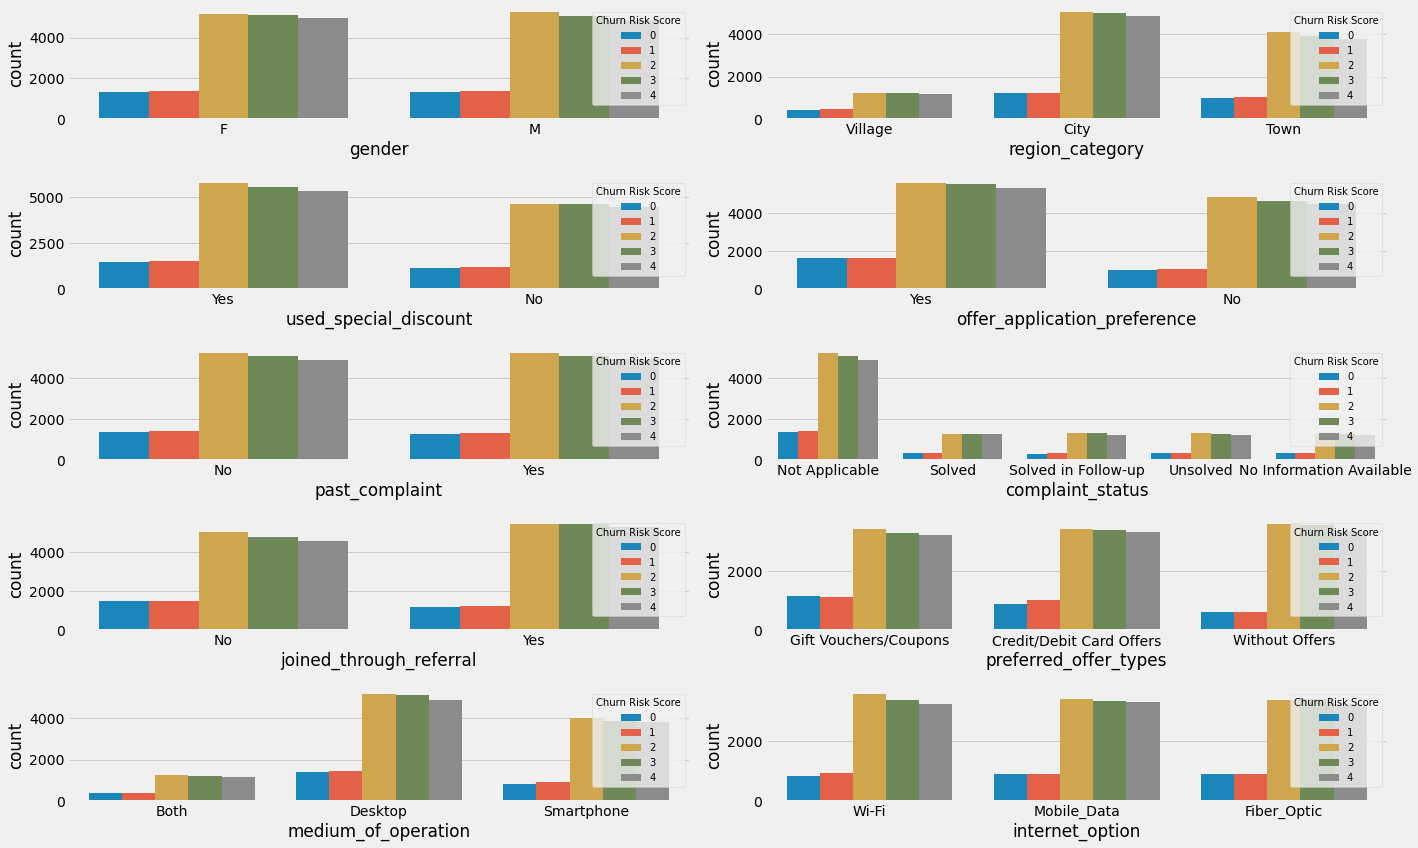

In [25]:
# Assuming dc_df is your DataFrame with categorical data and 'churn_risk_score'

fig, axarr = plt.subplots(5, 2, figsize=(20, 12))

sns.countplot(x='gender', hue='churn_risk_score', data=decodedli_df, ax=axarr[0][0])
sns.countplot(x='region_category', hue='churn_risk_score', data=decodedli_df, ax=axarr[0][1])
sns.countplot(x='used_special_discount', hue='churn_risk_score', data=decodedli_df, ax=axarr[1][0])
sns.countplot(x='offer_application_preference', hue='churn_risk_score', data=decodedli_df, ax=axarr[1][1])
sns.countplot(x='past_complaint', hue='churn_risk_score', data=decodedli_df, ax=axarr[2][0])
sns.countplot(x='complaint_status', hue='churn_risk_score', data=decodedli_df, ax=axarr[2][1])
sns.countplot(x='joined_through_referral', hue='churn_risk_score', data=decodedli_df, ax=axarr[3][0])
sns.countplot(x='preferred_offer_types', hue='churn_risk_score', data=decodedli_df, ax=axarr[3][1])
sns.countplot(x='medium_of_operation', hue='churn_risk_score', data=decodedli_df, ax=axarr[4][0])
sns.countplot(x='internet_option', hue='churn_risk_score', data=decodedli_df, ax=axarr[4][1])

# Control the size of the hue legend
for ax in axarr.flat:
    ax.legend(title='Churn Risk Score', title_fontsize='10', loc='upper right', fontsize='10')

plt.tight_layout()
plt.show()


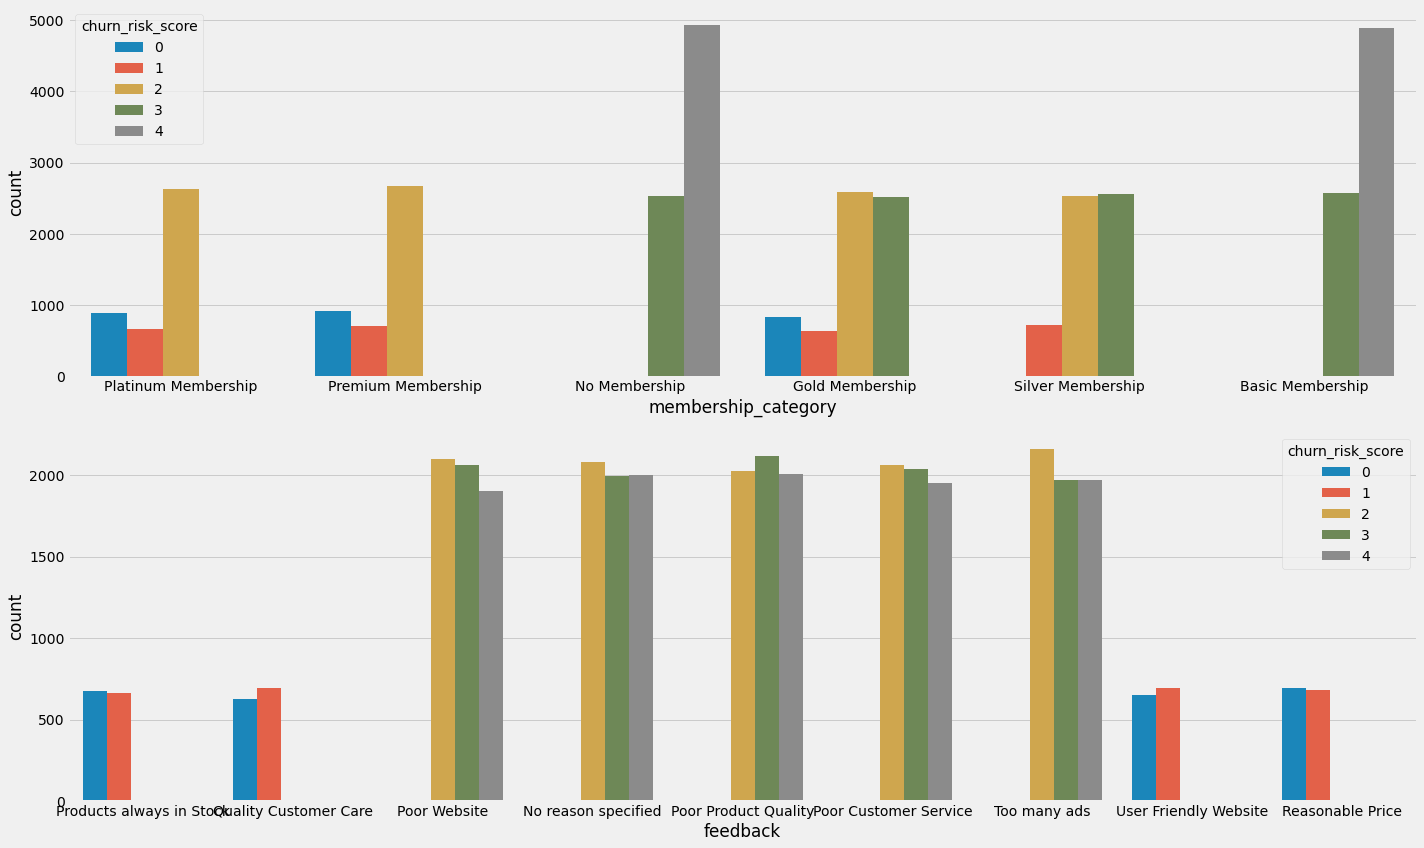

In [26]:
fig, axarr = plt.subplots(2, 1, figsize=(20, 12))  # Create 2 subplots

# Plot 1
sns.countplot(x='membership_category', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[0])

# Plot 2
sns.countplot(x='feedback', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[1])

plt.tight_layout()
plt.show()

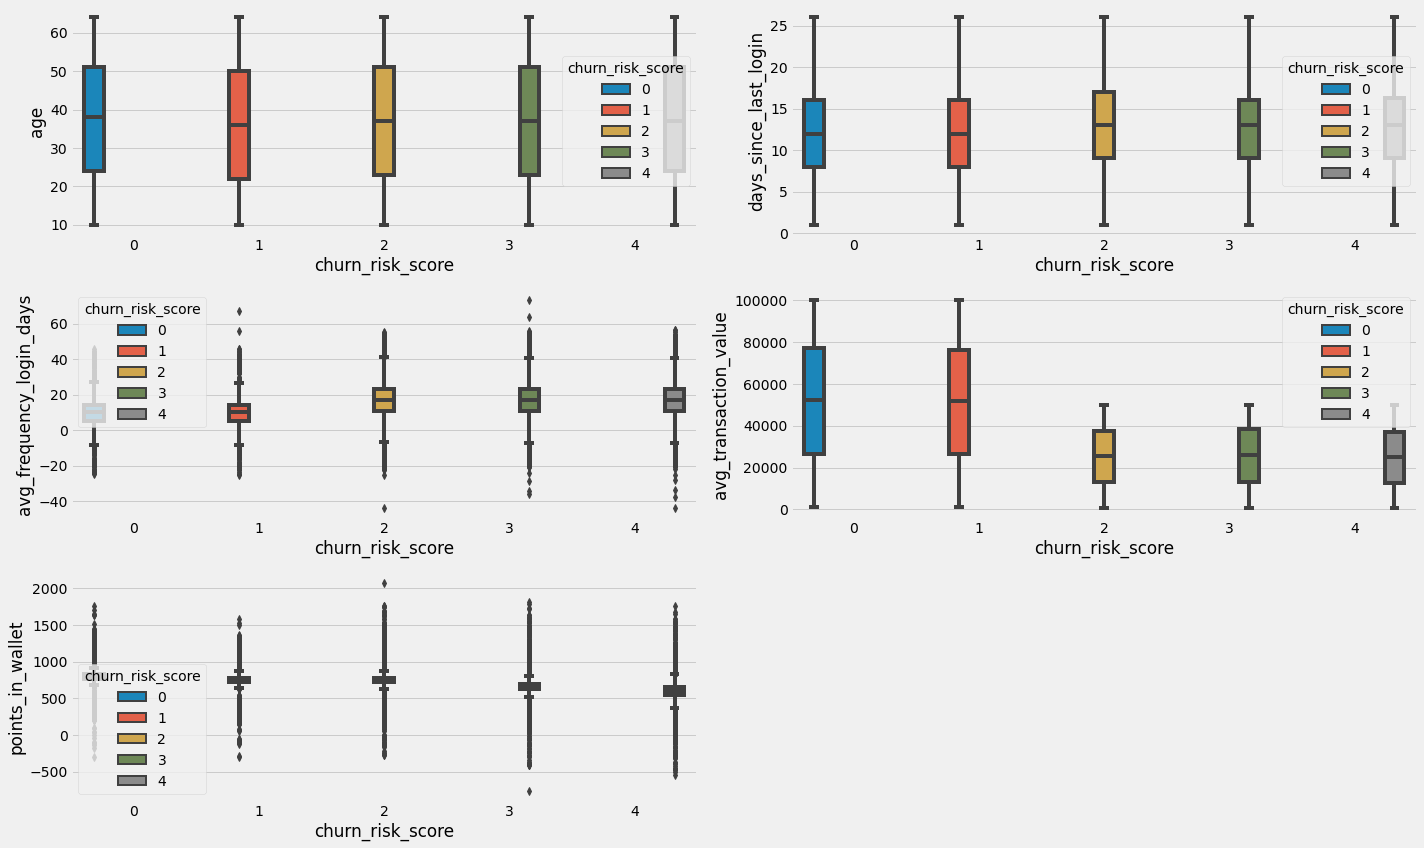

In [27]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

sns.boxplot(y='age',x = 'churn_risk_score', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[0][0])
sns.boxplot(y='days_since_last_login',x = 'churn_risk_score', hue = 'churn_risk_score',data = decodedli_df , ax=axarr[0][1])
sns.boxplot(y='avg_frequency_login_days',x = 'churn_risk_score', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[1][0])
sns.boxplot(y='avg_transaction_value',x = 'churn_risk_score', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[1][1])
sns.boxplot(y='points_in_wallet',x = 'churn_risk_score', hue = 'churn_risk_score',data = decodedli_df, ax=axarr[2][0])

# Remove the empty subplot
fig.delaxes(axarr[2][1])

plt.tight_layout()
plt.show()

In [28]:
def calculate_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define a mask for values outside the IQR
    outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

    # Count the number of outliers in each column
    outlier_counts = outlier_mask.sum()

    # Calculate the percentage of outliers in the entire DataFrame
    total_values = np.product(df.shape)
    total_outliers = outlier_counts.sum()
    outlier_percentage = total_outliers / total_values * 100

    return outlier_percentage

# Assuming df is your DataFrame
outlier_percentage = calculate_outliers(decodedli_df)
print(f"The percentage of outliers in the dataset is {outlier_percentage}%")

The percentage of outliers in the dataset is 1.5091127299115241%


In [29]:
# Define the constant multiplier for outlier detection (adjust as needed)
k = 1.5
k_extreme = 3.0

# Select only numeric columns from the DataFrame
numeric_cols = decodedli_df.select_dtypes(include=[np.number]).columns

# Loop over all numeric columns in the DataFrame
for column_name in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = decodedli_df[column_name].quantile(0.25)
    Q3 = decodedli_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers and extreme outliers
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    lower_bound_extreme = Q1 - k_extreme * IQR
    upper_bound_extreme = Q3 + k_extreme * IQR

    # Count outliers and extreme outliers
    lower_outliers_count = decodedli_df[decodedli_df[column_name] < lower_bound].shape[0]
    upper_outliers_count = decodedli_df[decodedli_df[column_name] > upper_bound].shape[0]
    lower_extreme_outliers_count = decodedli_df[decodedli_df[column_name] < lower_bound_extreme].shape[0]
    upper_extreme_outliers_count = decodedli_df[decodedli_df[column_name] > upper_bound_extreme].shape[0]

    # Print the results
    print(f"For {column_name}:")
    print(f"IQR: {IQR}")
    print(f"Number of outliers below the lower bound: {lower_outliers_count}")
    print(f"Number of outliers above the upper bound: {upper_outliers_count}")
    print(f"Number of extreme outliers below the lower bound: {lower_extreme_outliers_count}")
    print(f"Number of extreme outliers above the upper bound: {upper_extreme_outliers_count}")
    print("\n")

For age:
IQR: 28.0
Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 0
Number of extreme outliers below the lower bound: 0
Number of extreme outliers above the upper bound: 0


For days_since_last_login:
IQR: 7.0
Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 0
Number of extreme outliers below the lower bound: 0
Number of extreme outliers above the upper bound: 0


For avg_time_spent:
IQR: 296.52
Number of outliers below the lower bound: 1513
Number of outliers above the upper bound: 3008
Number of extreme outliers below the lower bound: 678
Number of extreme outliers above the upper bound: 854


For avg_transaction_value:
IQR: 26679.36
Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 1108
Number of extreme outliers below the lower bound: 0
Number of extreme outliers above the upper bound: 0


For avg_frequency_login_days:
IQR: 12.0
Number of outliers below the lower bound: 4

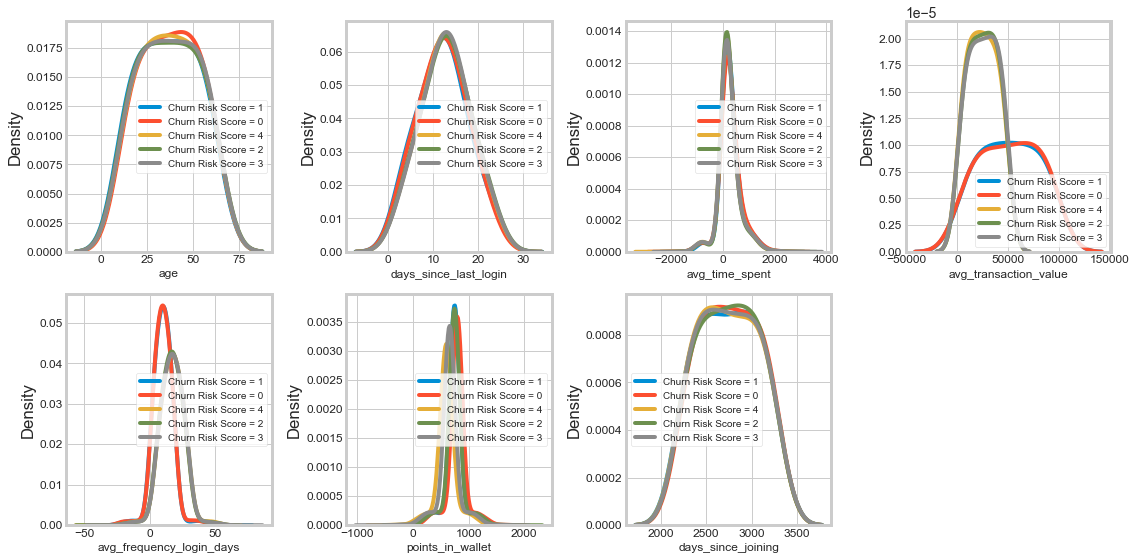

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrames 'decodedli_df' and 'dc_df' already defined

var = decodedli_df.select_dtypes(include=['float64', 'int']).columns.tolist()

# Get unique classes of churn_risk_score
classes = decodedli_df['churn_risk_score'].unique()

sns.set_style('whitegrid')

# Calculate the number of rows and columns based on the number of features
num_features = len(var)
num_rows = int(np.ceil(num_features / 4))
num_columns = 4

plt.figure(figsize=(16, num_rows * 4))  # Set figure size for better readability

i = 0
for feature in var:
    # Skip plotting churn_risk_score
    if feature == 'churn_risk_score':
        continue

    i += 1
    plt.subplot(num_rows, num_columns, i)
    for class_ in classes:
        t = decodedli_df.loc[decodedli_df['churn_risk_score'] == class_]
        sns.kdeplot(t[feature], bw_method=0.5, label=f"Churn Risk Score = {class_}")

    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Add the legend to the current subplot
    plt.legend(fontsize='10')

plt.tight_layout()
plt.show()

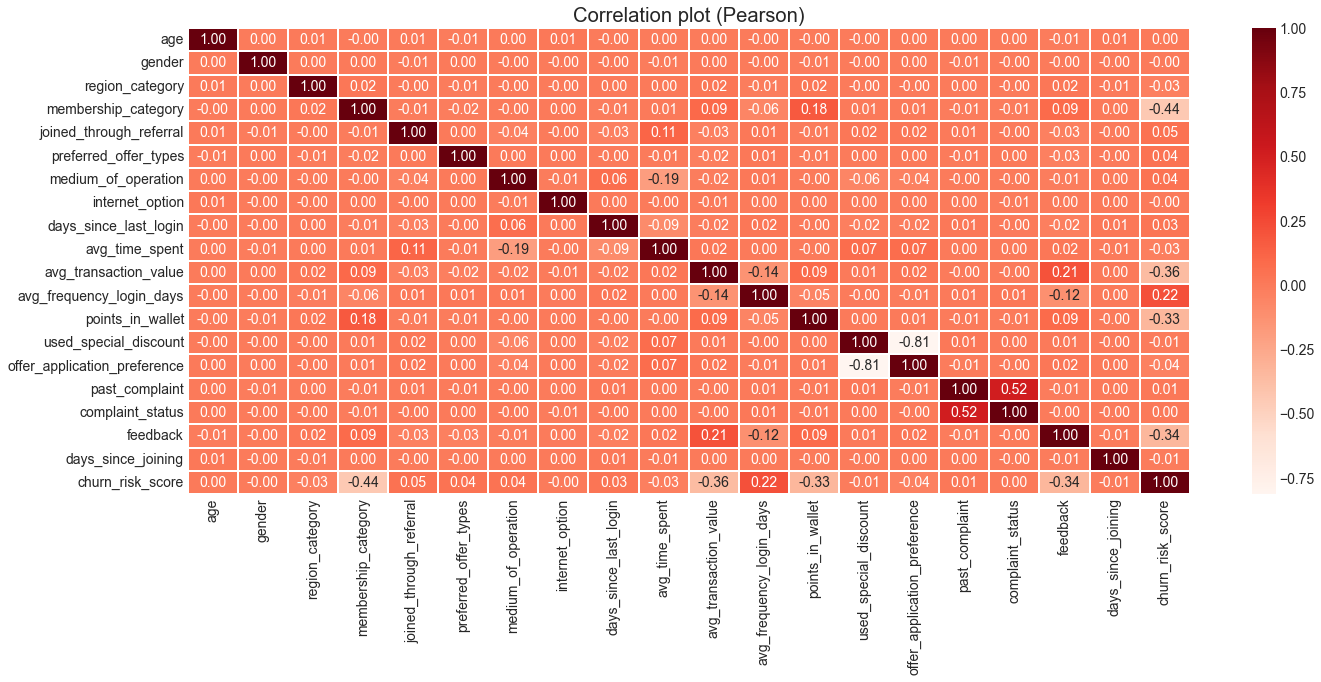

In [31]:
# Convert all non-numeric columns to numeric
for col in decodedli_df.columns:
    if imp_df[col].dtype == 'object':
        imp_df[col] = imp_df[col].astype('category').cat.codes

plt.figure(figsize = (20,8))
plt.title('Correlation plot (Pearson)')
# Calculate correlation matrix for all columns
corr = imp_df.corr()

# Create a heatmap with numbers
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Reds", annot=True, fmt=".2f")

plt.show()

### Handling outliers

In [32]:
# Define the constant multiplier for outlier detection (adjust as needed)
k = 1.5
k_extreme = 3.0

# Select only numeric columns from the DataFrame
numeric_cols = decodedli_df.select_dtypes(include=[np.number]).columns

# Loop over all numeric columns in the DataFrame
for column_name in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = decodedli_df[column_name].quantile(0.25)
    Q3 = decodedli_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers and extreme outliers
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    lower_bound_extreme = Q1 - k_extreme * IQR
    upper_bound_extreme = Q3 + k_extreme * IQR

    # Identify rows with extreme outliers
    extreme_outliers_mask = (
        (decodedli_df[column_name] < lower_bound_extreme) |
        (decodedli_df[column_name] > upper_bound_extreme)
    )

    # Drop rows with extreme outliers
    decodedli_df = decodedli_df[~extreme_outliers_mask]

# Print the updated DataFrame
print(decodedli_df)


        age gender region_category  membership_category  \
0     18.00      F         Village  Platinum Membership   
1     32.00      F            City   Premium Membership   
2     44.00      F            Town        No Membership   
3     37.00      M            City        No Membership   
4     31.00      F            City        No Membership   
...     ...    ...             ...                  ...   
36987 46.00      F            City     Basic Membership   
36988 29.00      F            Town     Basic Membership   
36989 23.00      F            City     Basic Membership   
36990 53.00      M         Village  Platinum Membership   
36991 35.00      M            Town    Silver Membership   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                          No     Gift Vouchers/Coupons                Both   
1                         Yes     Gift Vouchers/Coupons             Desktop   
2                         Yes     Gift Vouchers/Coupon

### OneHot encoding for categorical variables

In [33]:
categorical_variables = decodedli_df.select_dtypes(include='object').columns
num_cols = decodedli_df.drop(categorical_variables, axis=1).columns

# Save the index
index_values = decodedli_df.index

# Create separate DataFrames for numerical and categorical columns
num_df = decodedli_df[num_cols]
cat_df = decodedli_df[categorical_variables]

# Initialize OneHotEncoder without dropping the first category
encoder = OneHotEncoder(sparse=False)  # remove drop='first'

# Fit and transform the categorical DataFrame
cat_encoded = encoder.fit_transform(cat_df)

# Create a DataFrame with the one-hot encoded categorical columns and feature names
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_variables), index=cat_df.index)

# Combine the numerical and encoded categorical DataFrames using the index
hencoded_df = pd.concat([num_df, cat_encoded_df], axis=1)

# Restore the original index
hencoded_df.index = index_values

# Now, encoded_df contains the one-hot encoded DataFrame with the original index
hencoded_df.head(10)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_joining,churn_risk_score,gender_F,gender_M,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18.00,17.00,300.63,53005.25,17.00,781.75,2337.00,1,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,32.00,16.00,306.34,12838.38,10.00,799.05,2326.00,0,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,44.00,14.00,516.16,21027.00,22.00,500.69,2616.00,4,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,37.00,11.00,53.27,25239.56,6.00,567.66,2629.00,4,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,31.00,20.00,113.13,24483.66,16.00,663.06,2311.00,4,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
5,13.00,23.00,433.62,13884.77,24.00,722.27,2924.00,2,0.00,1.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,21.00,10.00,55.38,8982.50,28.00,756.21,3219.00,2,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,42.00,19.00,429.11,44554.82,24.00,568.08,2738.00,4,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8,44.00,15.00,191.07,18362.31,20.00,688.09,2583.00,2,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,45.00,10.00,97.31,19244.16,28.00,706.23,2597.00,3,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [34]:
print('Dimensions of the Training set:',hencoded_df.shape)

Dimensions of the Training set: (33130, 50)


In [35]:
hencoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33130 entries, 0 to 36991
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             33130 non-null  float64
 1   days_since_last_login                           33130 non-null  float64
 2   avg_time_spent                                  33130 non-null  float64
 3   avg_transaction_value                           33130 non-null  float64
 4   avg_frequency_login_days                        33130 non-null  float64
 5   points_in_wallet                                33130 non-null  float64
 6   days_since_joining                              33130 non-null  float64
 7   churn_risk_score                                33130 non-null  int64  
 8   gender_F                                        33130 non-null  float64
 9   gender_M                               

### Split into train and test

In [36]:
random_state=42

In [37]:
X = hencoded_df.drop(['churn_risk_score'], axis=1)
y = hencoded_df['churn_risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state,stratify=y)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(26504, 49) (6626, 49) (26504,) (6626,)


### Scaling data with Standard scaler

In [39]:
st_scaler = StandardScaler()

X_train_scaled = st_scaler.fit_transform(X_train)

X_test_scaled = st_scaler.transform(X_test)

In [40]:
# Fit the LazyClassifier
mod = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = mod.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [02:46<00:06,  6.49s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 26504, number of used features: 49
[LightGBM] [Info] Start training from score -2.609466
[LightGBM] [Info] Start training from score -2.561898
[LightGBM] [Info] Start training from score -1.232057
[LightGBM] [Info] Start training from score -1.260129
[LightGBM] [Info] Start training from score -1.294778


100%|██████████| 29/29 [02:47<00:00,  5.78s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.79               0.79    None      0.78   
XGBClassifier                      0.78               0.78    None      0.78   
RandomForestClassifier             0.79               0.78    None      0.78   
BaggingClassifier                  0.78               0.77    None      0.78   
DecisionTreeClassifier             0.75               0.74    None      0.75   
LogisticRegression                 0.73               0.71    None      0.71   
BernoulliNB                        0.74               0.70    None      0.71   
LinearSVC                          0.72               0.70    None      0.69   
CalibratedClassifierCV             0.72               0.70    None      0.70   
ExtraTreesClassifier               0.72               0.70    None      0.71   
SVC                                0.71 

### Feature selection - Random Forest Variable Importance

In [41]:
clf = RandomForestClassifier(n_estimators=500, max_depth = 15, random_state=random_state)
# fit the classifier to the training set
clf.fit(X_train_scaled, y_train)

# predict on the test set
y_pred = clf.predict(X_test_scaled)

Feature: 0, Score: 0.01954
Feature: 1, Score: 0.01778
Feature: 2, Score: 0.02308
Feature: 3, Score: 0.07725
Feature: 4, Score: 0.02886
Feature: 5, Score: 0.27712
Feature: 6, Score: 0.02261
Feature: 7, Score: 0.00307
Feature: 8, Score: 0.00304
Feature: 9, Score: 0.00326
Feature: 10, Score: 0.00320
Feature: 11, Score: 0.00241
Feature: 12, Score: 0.08426
Feature: 13, Score: 0.03435
Feature: 14, Score: 0.08145
Feature: 15, Score: 0.03578
Feature: 16, Score: 0.03742
Feature: 17, Score: 0.03859
Feature: 18, Score: 0.00301
Feature: 19, Score: 0.00297
Feature: 20, Score: 0.00314
Feature: 21, Score: 0.00321
Feature: 22, Score: 0.00305
Feature: 23, Score: 0.00224
Feature: 24, Score: 0.00318
Feature: 25, Score: 0.00311
Feature: 26, Score: 0.00317
Feature: 27, Score: 0.00319
Feature: 28, Score: 0.00316
Feature: 29, Score: 0.00250
Feature: 30, Score: 0.00245
Feature: 31, Score: 0.00245
Feature: 32, Score: 0.00251
Feature: 33, Score: 0.00223
Feature: 34, Score: 0.00222
Feature: 35, Score: 0.00224
Fe

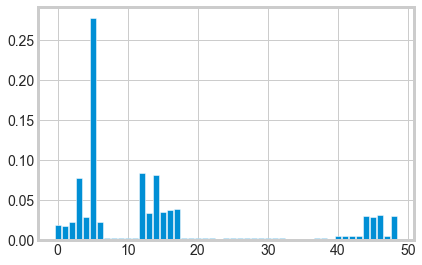

In [42]:
# get importance
importances = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [43]:
# get feature names
feature_names = X.columns

# sort features by importance
indices = np.argsort(importances)

# select top 45 features
top_45_features = [feature_names[i] for i in indices[-45:]]

In [44]:
selected_features = top_45_features

# Select the columns corresponding to the top 45 features from the original DataFrame
X_selected = X[selected_features]

# Split the data into training and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=random_state)

# Scale the data
X_train_scaled_selected = st_scaler.fit_transform(X_train_selected)
X_test_scaled_selected = st_scaler.transform(X_test_selected)

In [48]:
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize lists to store metrics
train_accuracy1 = []
test_accuracy1 = []
precision1 = []
recall1 = []
f11 = []
mauc1 = []
models1 = ["Random Forest", "LGBM", "XGBoost", "Bagging"]
classifiers1 = []

classifiers1.append(RandomForestClassifier(n_estimators=100))
classifiers1.append(LGBMClassifier())
classifiers1.append(XGBClassifier(objective='multi:softmax', num_class=5))
classifiers1.append(BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100))

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

for classifier, model in zip(classifiers1, models1):
    print('=' * len(model))
    print(model)
    print('=' * len(model))
    
    # Cross-validation on the training set
    cv_train_accuracy = cross_val_score(classifier, X_train_scaled_selected, y_train, cv=cv, scoring='accuracy')
    train_accuracy1.append(cv_train_accuracy.mean())

    # Fit the classifier to the entire training set
    classifier.fit(X_train_scaled_selected, y_train)

    # Predict on the test set
    prediction = classifier.predict(X_test_scaled_selected)

    # Evaluate metrics on the test set
    testaccuracy = accuracy_score(y_test, prediction)
    test_accuracy1.append(testaccuracy)
    precision1.append(precision_score(y_test, prediction, average='macro'))
    recall1.append(recall_score(y_test, prediction, average='macro'))
    f11.append(f1_score(y_test, prediction, average='macro'))

    # Use predict_proba for multi-class classification
    if hasattr(classifier, 'predict_proba'):
        y_probs = classifier.predict_proba(X_test_scaled_selected)
        roc_auc = metrics.roc_auc_score(y_test, y_probs, multi_class='ovr')  # Specify 'ovr' here
        mauc1.append(roc_auc)  # Append to roc1, not RocCurveDisplay
    else:
        print(f"Model {model} doesn't support predict_proba, skipping ROC AUC calculation.")
        mauc1.append(None)


print('\n classification report:\n', classification_report(y_test, prediction, digits=5))
print('\n confusion matrix:\n', confusion_matrix(y_test, prediction))
print('\n')

# Create a DataFrame to store the results
scoreDf1 = pd.DataFrame({'Model': models1})
scoreDf1['Train Accuracy'] = train_accuracy1
scoreDf1['Test Accuracy'] = test_accuracy1
scoreDf1['Precision'] = precision1
scoreDf1['Recall'] = recall1
scoreDf1['F1 Score'] = f11
scoreDf1['MAUC Score'] = mauc1

scoreDf1.set_index("Model")


Random Forest
====
LGBM
====
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1662
[LightGBM] [Info] Number of data points in the train set: 21203, number of used features: 45
[LightGBM] [Info] Start training from score -2.602430
[LightGBM] [Info] Start training from score -2.562500
[LightGBM] [Info] Start training from score -1.232824
[LightGBM] [Info] Start training from score -1.260385
[LightGBM] [Info] Start training from score -1.295423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1660
[LightGBM] [Info] Number of data points in the train set: 21203, number of used features: 45
[LightGBM] [Info] Start training from score -2.603067
[LightGBM] [Info] Start training from score -2.563112
[LightGBM] [Inf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,MAUC Score
Model,,,,,,
Random Forest,0.78,0.78,0.78,0.77,0.77,0.96
LGBM,0.78,0.78,0.78,0.77,0.77,0.97
XGBoost,0.78,0.78,0.78,0.78,0.78,0.97
Bagging,0.78,0.77,0.77,0.77,0.76,0.96


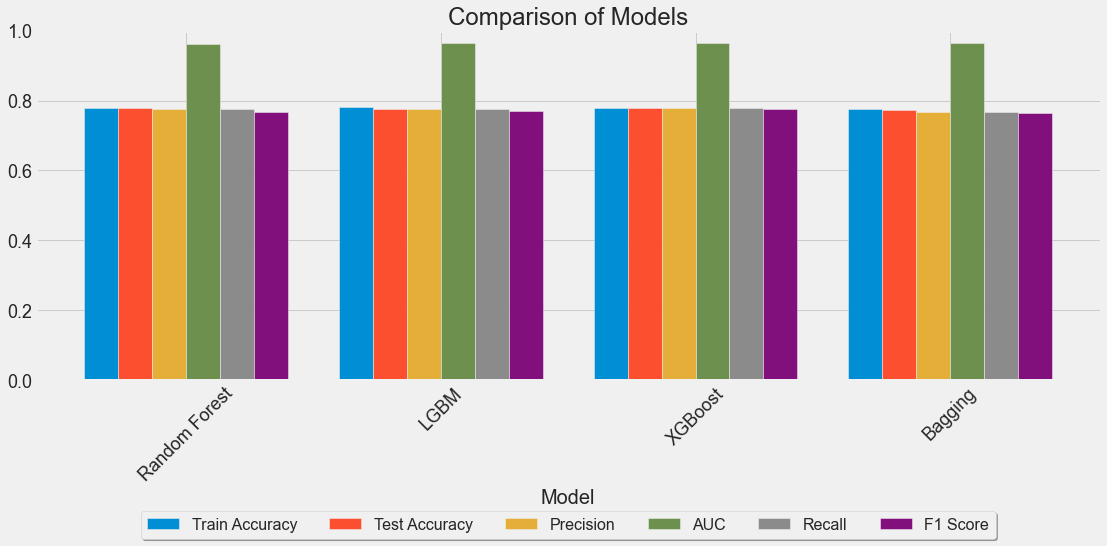

In [49]:
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'MAUC Score','Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models1, [scoreDf1['Train Accuracy'], scoreDf1['Test Accuracy'], scoreDf1['Precision'], scoreDf1['MAUC Score'], scoreDf1['Recall'], scoreDf1['F1 Score']])
plt.ylim(0, 1.0)
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'AUC','Recall','F1 Score']
#plt.legend(cols)

plt.legend(cols, loc='upper center', bbox_to_anchor=(0.5, -0.35),
          fancybox=True, shadow=True, ncol=7)


plt.xlabel('Model', fontsize = 20)
plt.xticks(rotation = 45)

plt.title("Comparison of Models", fontsize = 24)
plt.show()

### Applying Oversampling on training data

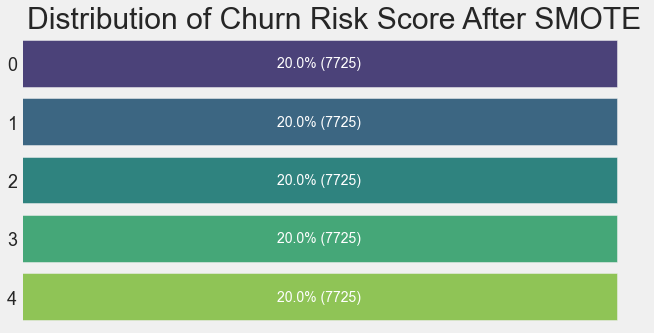

In [50]:
# Apply SMOTE to the training data only 'y_os'
smote = SMOTE(random_state=42)
X_train_scaled_selected_os, y_train_os = smote.fit_resample(X_train_scaled_selected, y_train)

counts = y_train_os.value_counts().sort_index()
percentages = (counts / len(y_train_os) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis', orient='h')

# Remove x-axis
ax.xaxis.set_visible(False)

# Add labels to each bar
for i, (count, percent) in enumerate(zip(counts.values, percentages.values)):
    ax.text(count/2, i, f"{percent}% ({count})", va='center', ha='center', color='white')

plt.title('Distribution of Churn Risk Score After SMOTE')
plt.show()

In [53]:
from sklearn.calibration import label_binarize


train_accuracy2 = []
test_accuracy2 = []
precision2 = []
recall2 = []
f12 = []
mauc2 = []
models2 = ["Random Forest", "LGBM", "XGBoost", "Bagging"]
classifiers2 = []
classifiers2.append(RandomForestClassifier(n_estimators=100))
classifiers2.append(LGBMClassifier())
classifiers2.append(XGBClassifier(objective='multi:softmax', num_class=5))
classifiers2.append(BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100))

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

for classifier, model in zip(classifiers2, models2):
    print('=' * len(model))
    print(model)
    print('=' * len(model))

    # Cross-validation on the training set
    cv_train_accuracy = cross_val_score(classifier, X_train_scaled_selected_os, y_train_os, cv=cv, scoring='accuracy')
    train_accuracy2.append(cv_train_accuracy.mean())

    # Fit the classifier to the entire training set
    classifier.fit(X_train_scaled_selected_os, y_train_os)

    # Predict on the test set
    prediction = classifier.predict(X_test_scaled_selected)

    # Evaluate metrics on the test set
    testaccuracy = accuracy_score(y_test, prediction)
    test_accuracy2.append(testaccuracy)
    precision2.append(precision_score(y_test, prediction, average='macro'))
    recall2.append(recall_score(y_test, prediction, average='macro'))
    f12.append(f1_score(y_test, prediction, average='macro'))

    # Calculate Multi-Class AUC
    if hasattr(classifier, 'predict_proba'):
        y_probs = classifier.predict_proba(X_test_scaled_selected)
        mauc = metrics.roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_probs, multi_class='ovr')
        mauc2.append(mauc)
    else:
        print(f"Model {model} doesn't support predict_proba, skipping MAUC calculation.")
        mauc2.append(None)

# Display metrics
print('\n classification report:\n', classification_report(y_test, prediction, digits=5))
print('\n confusion matrix:\n', confusion_matrix(y_test, prediction))
print('\n')

# Create a DataFrame to store the results
scoreDf2 = pd.DataFrame({'Model': models2})
scoreDf2['Train Accuracy'] = train_accuracy2
scoreDf2['Test Accuracy'] = test_accuracy2
scoreDf2['Precision'] = precision2
scoreDf2['Recall'] = recall2
scoreDf2['F1 Score'] = f12
scoreDf2['MAUC Score'] = mauc2

scoreDf2.set_index("Model")


Random Forest
====
LGBM
====
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8730
[LightGBM] [Info] Number of data points in the train set: 30900, number of used features: 45
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8728
[LightGBM] [Info] Number of data points in the train set: 30900, number of used features

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,MAUC Score
Model,,,,,,
Random Forest,0.86,0.77,0.77,0.77,0.76,0.96
LGBM,0.83,0.78,0.78,0.78,0.78,0.97
XGBoost,0.83,0.78,0.78,0.78,0.78,0.97
Bagging,0.84,0.78,0.77,0.77,0.77,0.96


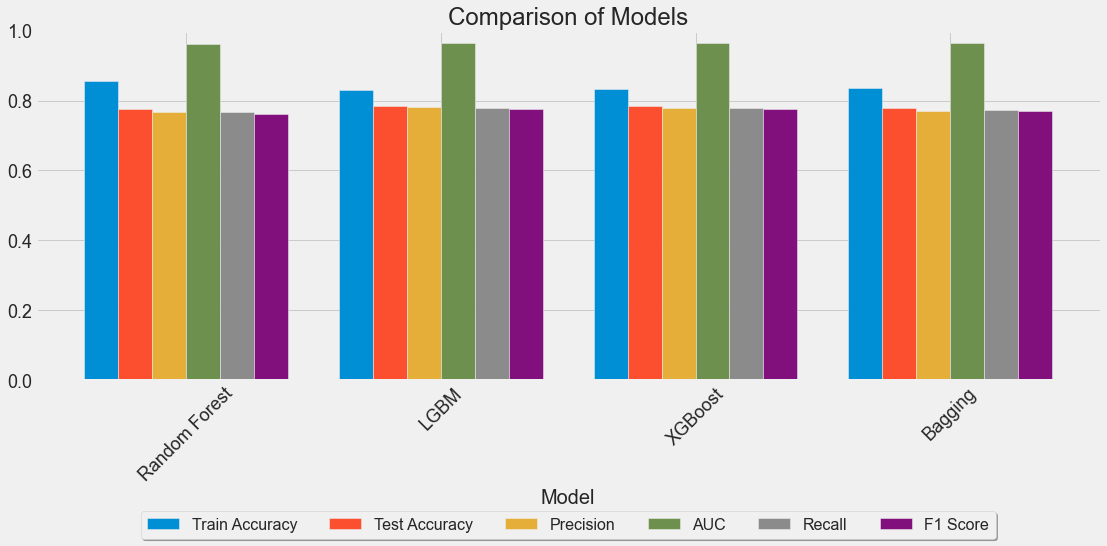

In [54]:
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'MAUC Score','Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models2, [scoreDf2['Train Accuracy'], scoreDf2['Test Accuracy'], scoreDf2['Precision'], scoreDf2['MAUC Score'], scoreDf2['Recall'], scoreDf2['F1 Score']])
plt.ylim(0, 1.0)
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'AUC','Recall','F1 Score']
#plt.legend(cols)

plt.legend(cols, loc='upper center', bbox_to_anchor=(0.5, -0.35),
          fancybox=True, shadow=True, ncol=7)


plt.xlabel('Model', fontsize = 20)
plt.xticks(rotation = 45)

plt.title("Comparison of Models", fontsize = 24)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 5300, number of used features: 45
[LightGBM] [Info] Start training from score -2.637926
[LightGBM] [Info] Start training from score -2.559305
[LightGBM] [Info] Start training from score -1.228807
[LightGBM] [Info] Start training from score -1.259579
[LightGBM] [Info] Start training from score -1.292014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 5301, number of used features: 45
[LightGBM] [Info] Start training from score -2.635480
[LightGBM] [Info] Start t

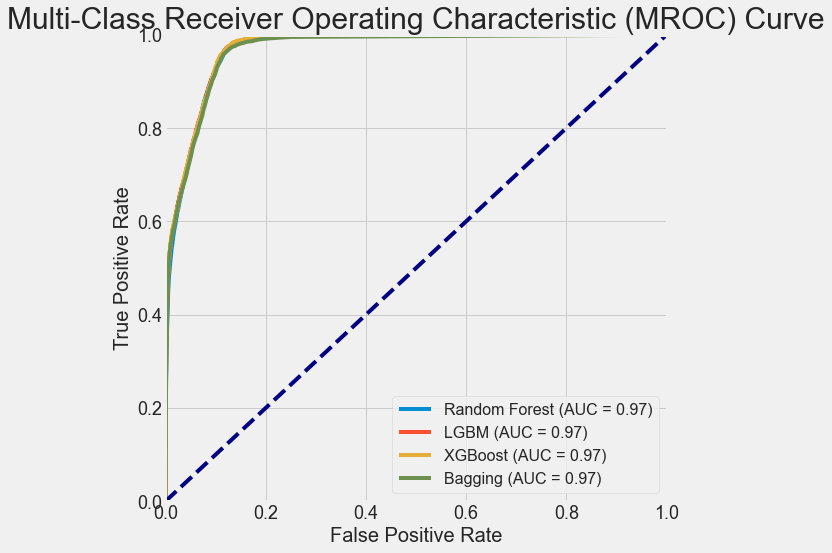

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_predict


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Plot a single MROC curve for all models
plt.figure(figsize=(8, 8))

for classifier, model in zip(classifiers2, models2):
    if hasattr(classifier, 'predict_proba'):
        y_probs = cross_val_predict(classifier, X_test_scaled_selected, y_test, method='predict_proba', cv=cv)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (MROC) Curve')
plt.legend(loc='lower right')
plt.show()


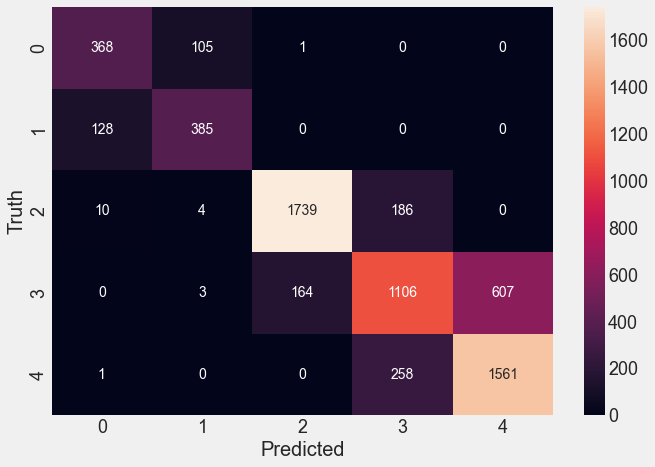

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the last prediction is the one you want to visualize
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Champion model

### XGBoost model with hyperparameter tuning

In [152]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from sparkxgb import XGBoostClassifier


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRFClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

In [68]:
# Create an instance of the XGBRFClassifier
xgbrf = XGBRFClassifier()

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgbrf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train_scaled_selected_os, y_train_os)


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [70]:
# Print the best hyperparameters found by the grid search
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters: {best_params_xgb}")

# Use the best model to make predictions on the test set
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_scaled_selected)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Additional metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.7852

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       474
           1       0.79      0.72      0.75       513
           2       0.89      0.94      0.91      1939
           3       0.87      0.44      0.58      1880
           4       0.69      1.00      0.81      1820

    accuracy                           0.79      6626
   macro avg       0.79      0.78      0.76      6626
weighted avg       0.81      0.79      0.77      6626



Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


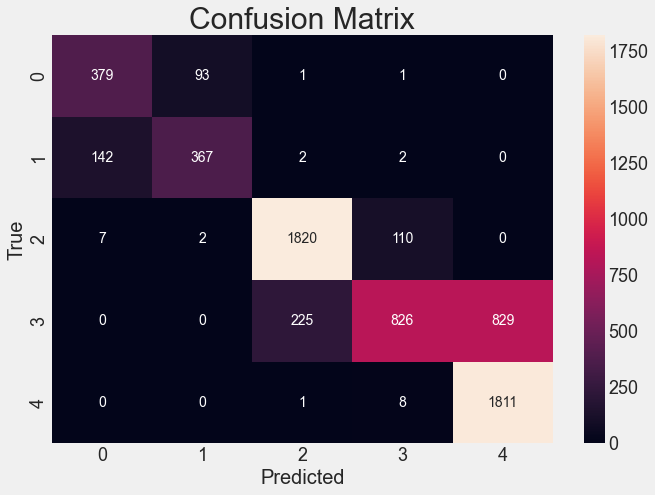

In [76]:
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters: {best_params_xgb}")

# Use the best model to make predictions on the test set
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_scaled_selected)


# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [71]:
param_grid2 = {
'n_estimators': [300, 500, 700],
'learning_rate': [0.01, 0.05],
'max_depth': [6, 8, 10],
'subsample': [0.7, 0.8],
'colsample_bytree': [0.7, 0.8],
'gamma': [0, 1],
'reg_alpha':[0.001, 0.01],
}

In [72]:
xgbrf = XGBRFClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb1 = GridSearchCV(estimator=xgbrf,
param_grid=param_grid2,
scoring='accuracy',
cv=cv,
verbose=True)

In [73]:
grid_search_xgb1.fit(X_train_scaled_selected_os, y_train_os)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_c...
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.05], 'max_depth': [6, 8, 10],
                         'n_estimators': [300, 500, 700],
                         'reg_alpha': [0.001, 0.01], 'subsample': [0.7, 0.8]},
             scoring='accuracy', verbose=True)

In [74]:
print("Best parameters: ", grid_search_xgb1.best_params_)
print("Best score: ", grid_search_xgb1.best_score_)

#Make predictions
y_pred2 = grid_search_xgb1.predict(X_test_scaled_selected)

#Evaluate performance
print(classification_report(y_test, y_pred2))


Best parameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0.001, 'subsample': 0.8}
Best score:  0.8350809061488673
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       474
           1       0.80      0.72      0.76       513
           2       0.90      0.94      0.92      1939
           3       0.87      0.45      0.59      1880
           4       0.69      1.00      0.81      1820

    accuracy                           0.79      6626
   macro avg       0.80      0.78      0.77      6626
weighted avg       0.81      0.79      0.77      6626



Best parameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0.001, 'subsample': 0.8}
Best score:  0.8350809061488673


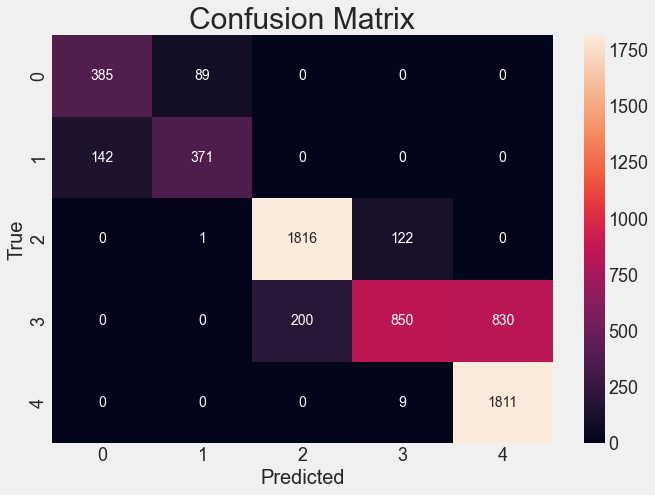

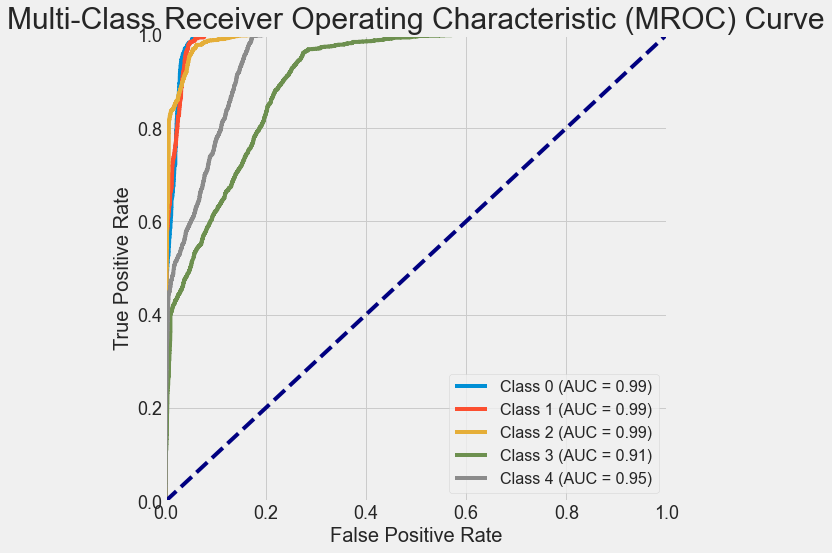

In [86]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
print("Best parameters: ", grid_search_xgb1.best_params_)
print("Best score: ", grid_search_xgb1.best_score_)

#Make predictions
y_pred2 = grid_search_xgb1.predict(X_test_scaled_selected)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
import matplotlib.pyplot as plt
# Assuming the last prediction is the one you want to visualize
y_probs = grid_search_xgb1.predict_proba(X_test_scaled_selected)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot a single MROC curve for all classes
plt.figure(figsize=(8, 8))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (MROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random forest classifier model with hyperparameter tuning

In [79]:
random_search_model = RandomForestClassifier(random_state=42)
grid_search_model = RandomForestClassifier(random_state=42)

In [80]:
from sklearn.model_selection import KFold
cv_split = KFold(n_splits=5, random_state=42, shuffle=True)

In [81]:
rf_hyperparam_grid={
    "n_estimators": [100, 500],
    "max_features": ['auto', 7, 10, 15],
    "min_samples_leaf": [1, 5, 20, 100],
    "min_samples_split": [2, 10, 50, 250],
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 6, 8, 10, None]
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

rf_random_search=RandomizedSearchCV(
    estimator=random_search_model,
    param_distributions=rf_hyperparam_grid,
    n_iter=200,
    scoring="neg_log_loss",
    refit=True,
    return_train_score=True,
    cv=cv_split,    
    verbose=10,
    n_jobs=-1,
    random_state=42
)

In [83]:
tuned_random_model = rf_random_search.fit(X_train_scaled_selected_os, y_train_os)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [84]:
tuned_random_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 15,
 'max_depth': None,
 'criterion': 'entropy'}

In [85]:
from sklearn.metrics import classification_report
# Predictions using the tuned grid model
grid_y_pred = tuned_random_model.predict(X_test_scaled_selected)
print("Classification Report for Tuned Grid Search Model:")
print(classification_report(y_test, grid_y_pred))


Classification Report for Tuned Grid Search Model:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       474
           1       0.79      0.74      0.76       513
           2       0.91      0.91      0.91      1939
           3       0.74      0.54      0.63      1880
           4       0.70      0.90      0.79      1820

    accuracy                           0.78      6626
   macro avg       0.78      0.77      0.77      6626
weighted avg       0.78      0.78      0.77      6626



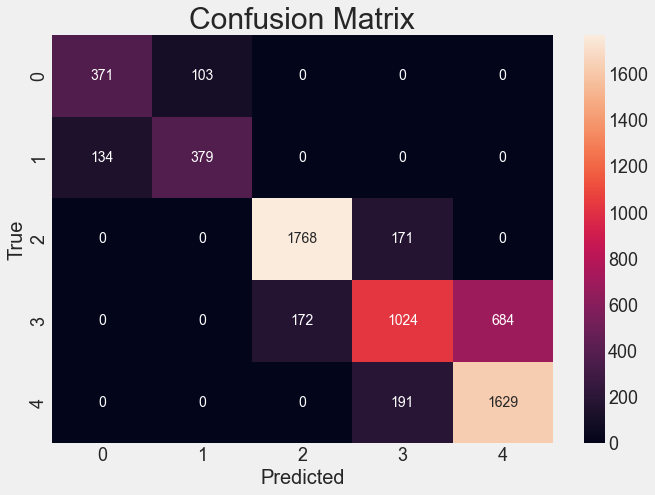

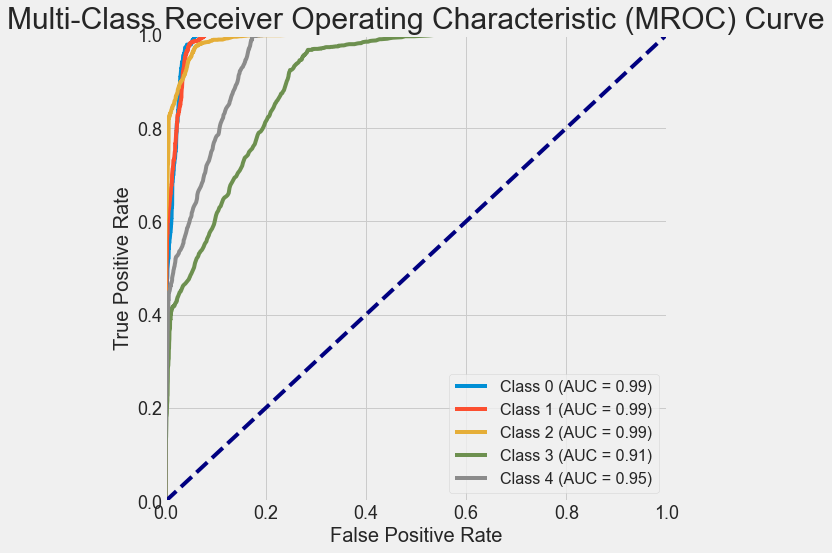

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the last prediction is the one you want to visualize
cm = confusion_matrix(y_test, grid_y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate the probabilities for each class
probs = tuned_random_model.predict_proba(X_test_scaled_selected)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot a single MROC curve for all classes
plt.figure(figsize=(8, 8))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (MROC) Curve')
plt.legend(loc='lower right')
plt.show()
